# 📊 YouTube ETL Data Analysis

This notebook loads and analyzes Parquet files organized by region and category. It includes:
- Loading all Parquet files from a folder tree
- Adding metadata (region, category_id)
- Parsing dates
- Plotting trends and engagement metrics

In [1]:
# 📦 1. Import Libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Notebook config
sns.set(style='whitegrid')

In [2]:
# 📁 2. Load All Parquet Files with Region & Category
root_dir = Path("Resulted Data")
parquet_files = list(root_dir.rglob("*.parquet"))

dfs = []
for file in parquet_files:
    match = re.search(r"region=(\w+)[/\\]category_id=(\d+)", str(file))
    if match:
        region = match.group(1)
        category_id = int(match.group(2))
        df = pd.read_parquet(file)
        df['region'] = region
        df['category_id'] = category_id
        dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)
print(f"✅ Loaded {len(df_all)} rows from {len(parquet_files)} files.")
df_all.head()

✅ Loaded 82870 rows from 29 files.


,ratings_disabled,comments_disabled,snippet_title,trending_date,etag,video_id,thumbnail_link,snippet_assignable,kind,comment_count,...,views,channel_title,title,snippet_channelid,publish_time,tags,video_error_or_removed,id,region,category_id
0,False,False,Film & Animation,18.12.03,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",P55yM3JjC0c,https://i.ytimg.com/vi/P55yM3JjC0c/default.jpg,True,youtube#videoCategory,91,...,61936,Jason's Cartoon Favorites,Star VS the Forces of Evil: Eclipsa's Trial,UCBR8-60-B28hp2BmDPdntcQ,2018-03-12T00:00:42.000Z,[none],False,1,ca,1
1,False,False,Film & Animation,17.31.12,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",KstnLGOEl00,https://i.ytimg.com/vi/KstnLGOEl00/default.jpg,True,youtube#videoCategory,348,...,196029,محمد المهاجر,مسلسل عروس اسطنبول الحلقة 31 كاملة مترجمة Full HD,UCBR8-60-B28hp2BmDPdntcQ,2017-12-30T10:46:59.000Z,[none],False,1,ca,1
2,False,False,Film & Animation,18.31.03,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",wT7Th2XJTsA,https://i.ytimg.com/vi/wT7Th2XJTsA/default.jpg,True,youtube#videoCategory,3338,...,1287199,고몽,남자가 준 음료수를 먹고 몹쓸짓에 촬영까지 당한 소녀들,UCBR8-60-B28hp2BmDPdntcQ,2018-03-30T08:04:55.000Z,24-03-2018,False,1,ca,1
3,False,False,Film & Animation,17.04.12,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",SRmmp9T0kVI,https://i.ytimg.com/vi/SRmmp9T0kVI/default.jpg,True,youtube#videoCategory,48,...,117567,Legends Dragon,New Hallmark Movies (2017) Christmas in Everg...,UCBR8-60-B28hp2BmDPdntcQ,2017-12-03T06:22:02.000Z,[none],False,1,ca,1
4,False,False,Film & Animation,18.17.03,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",-xMhy9JS6_c,https://i.ytimg.com/vi/-xMhy9JS6_c/default.jpg,True,youtube#videoCategory,124,...,16844,Q TV,CNN Anderson Cooper 360 03/16/18 | BREAKING NE...,UCBR8-60-B28hp2BmDPdntcQ,2018-03-17T01:37:14.000Z,[none],False,1,ca,1


In [3]:
# 🧼 3. Data Cleaning & Feature Engineering
df_all['trending_date_parsed'] = pd.to_datetime(
    df_all['trending_date'], format='%y.%d.%m', errors='coerce'
)
df_all['engagement_rate'] = (df_all['likes'] + df_all['comment_count']) / df_all['views']
df_all = df_all.replace([float('inf'), -float('inf')], 0)

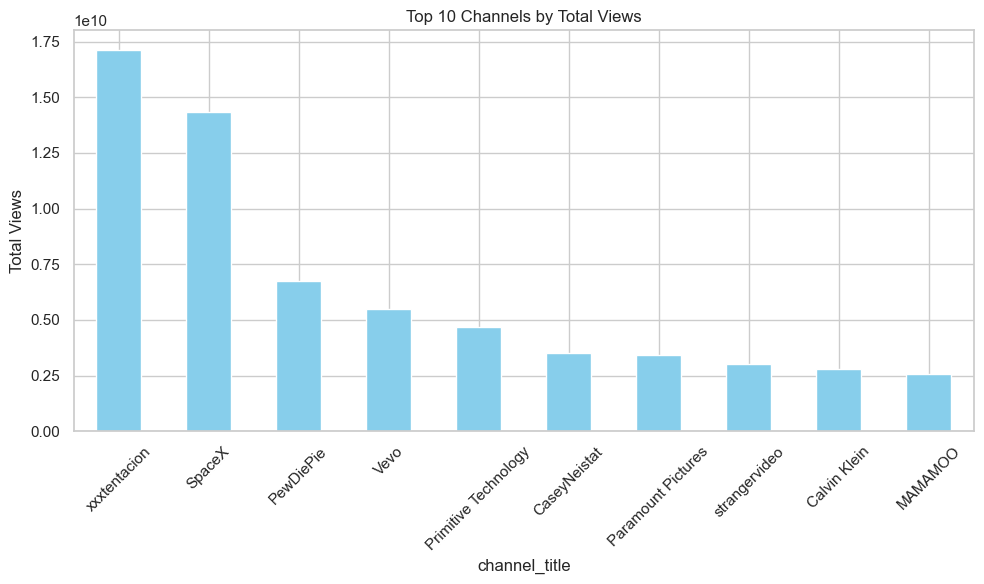

In [4]:
# 📊 4.1 Top 10 Channels by Views
top_channels = df_all.groupby('channel_title')['views'].sum().sort_values(ascending=False).head(10)
top_channels.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Top 10 Channels by Total Views')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c:\Users\atif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\atif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\atif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\atif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

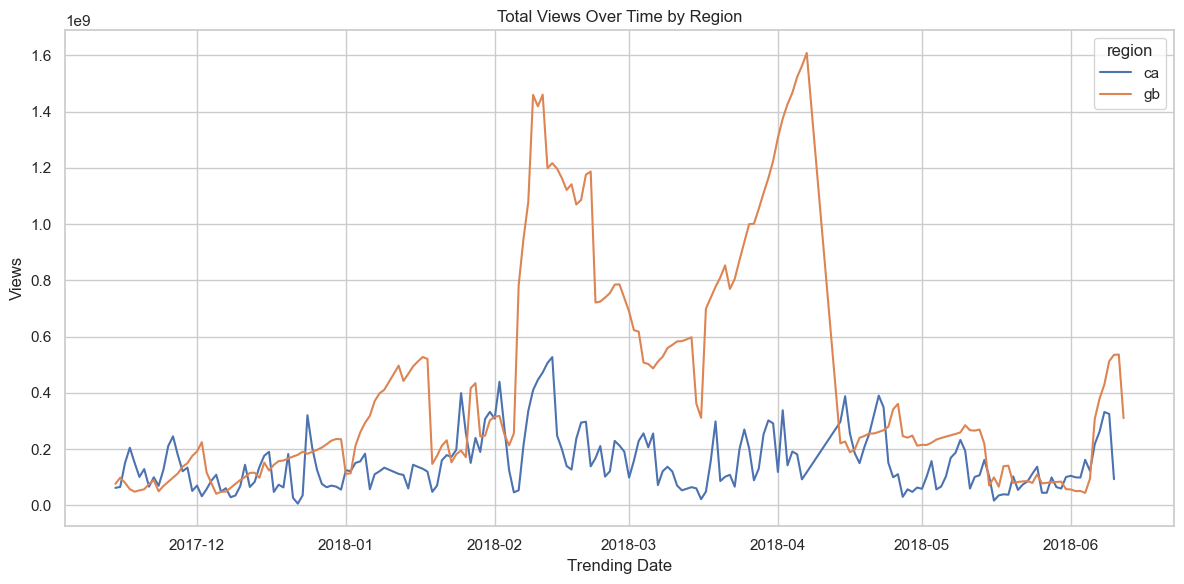

In [5]:
# 📊 4.2 Views Over Time by Region
trend_data = df_all.groupby(['trending_date_parsed', 'region'])['views'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=trend_data, x='trending_date_parsed', y='views', hue='region')
plt.title('Total Views Over Time by Region')
plt.ylabel('Views')
plt.xlabel('Trending Date')
plt.grid(True)
plt.tight_layout()
plt.show()

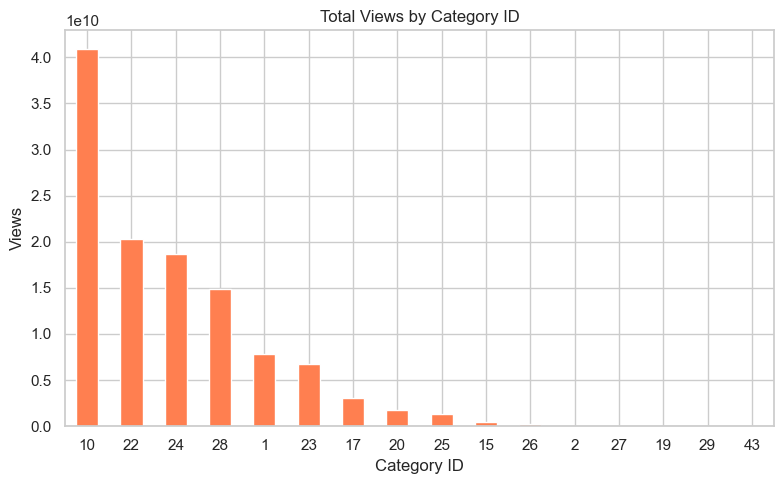

In [6]:
# 📊 4.3 Views by Category
cat_views = df_all.groupby('category_id')['views'].sum().sort_values(ascending=False)
cat_views.plot(kind='bar', figsize=(8,5), color='coral')
plt.title('Total Views by Category ID')
plt.ylabel('Views')
plt.xlabel('Category ID')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

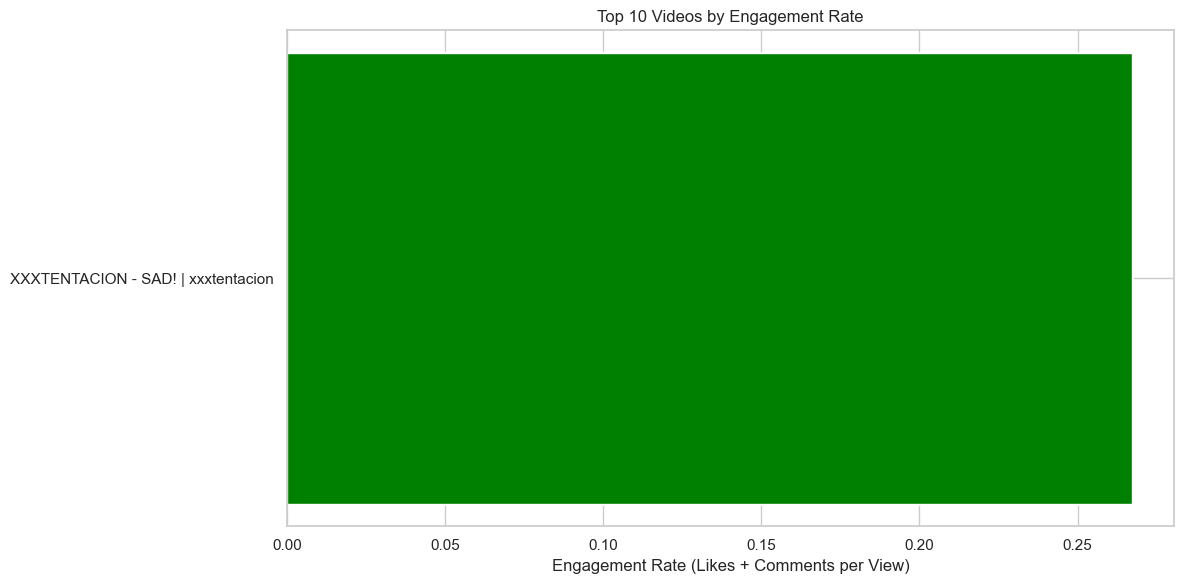

In [11]:
# 📊 4.4 Top 10 Videos by Engagement Rate
# Combine title and channel for a more unique label
top_engaged = df_all.sort_values('engagement_rate', ascending=False).head(10)
top_engaged['label'] = top_engaged['title'] + " | " + top_engaged['channel_title']

plt.figure(figsize=(12,6))
plt.barh(top_engaged['label'], top_engaged['engagement_rate'], color='green')
plt.xlabel('Engagement Rate (Likes + Comments per View)')
plt.title('Top 10 Videos by Engagement Rate')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


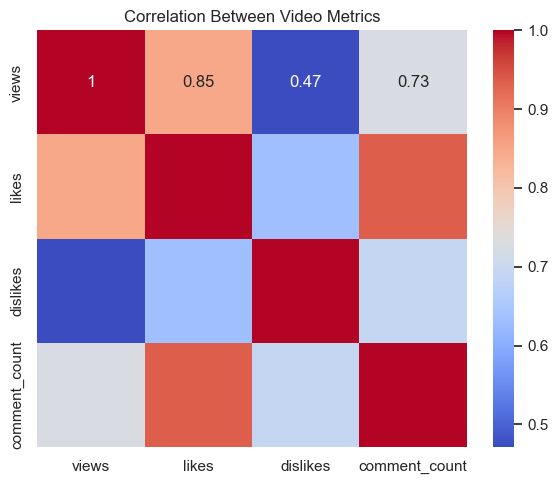

In [ ]:
# 📊 4.5 Correlation Heatmap
numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']
plt.figure(figsize=(6,5))
sns.heatmap(df_all[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Video Metrics")
plt.tight_layout()
plt.show()


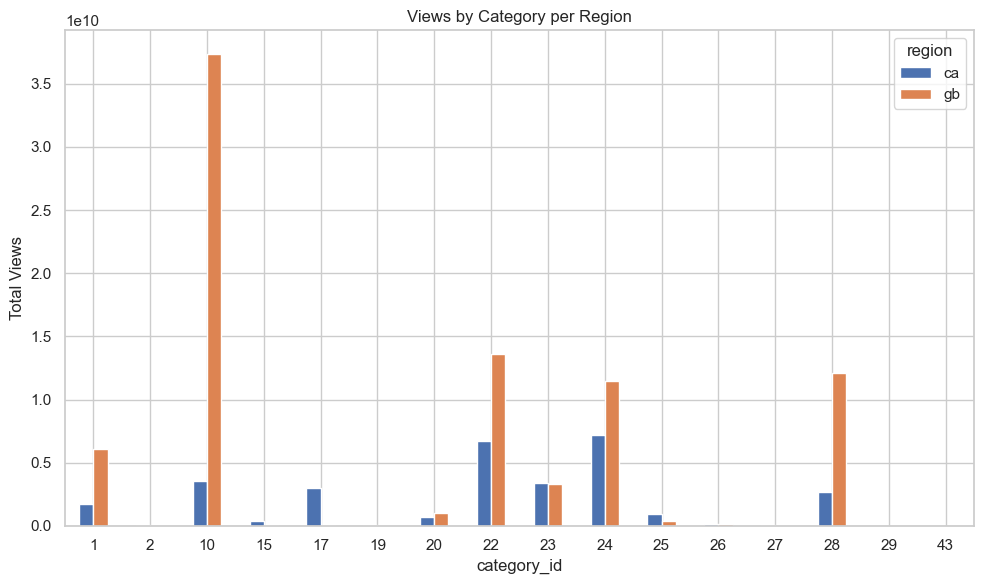

In [9]:
# 🔁 Views by Category & Region
pivot = df_all.pivot_table(index='category_id', columns='region', values='views', aggfunc='sum').fillna(0)
pivot.plot(kind='bar', figsize=(10,6), title="Views by Category per Region")
plt.ylabel('Total Views')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()